# Nutrition Analysis

### EDA on nutritional data extracted from the United States Departmetn of Agriculture database, which includes data complied from over 7000 individual food items.

In [5]:
import pandas as pd
import pandas_profiling

In [9]:
df = pd.read_csv('D:/DS/USDA.csv')

#### Basic overview of the data

In [6]:
pandas_profiling.ProfileReport(df)

Number of variables,16
Number of observations,7058
Total Missing (%),8.1%
Total size in memory,882.3 KiB
Average record size in memory,128.0 B
Numeric,15
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [7]:
df.sample(5)

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
1424,7225,"OSCAR MAYER,PORK SAUSAGE LINKS (CKD)",343.0,16.30,30.50,1.00,836.0,10.690,77.0,0.90,16.0,1.72,238.0,0.0,NaN,NaN
873,6019,"SOUP,CHICK NOODLE,CND,COND",52.0,2.59,1.94,6.03,706.0,0.542,11.0,0.54,9.0,1.35,44.0,0.0,0.05,0.0
1196,6500,"SOUP,VEG BF,DRY,MIX,PREP W/ H2O",21.0,1.16,0.44,3.17,312.0,0.220,0.0,0.36,6.0,0.21,72.0,0.8,0.08,0.0
412,4638,"SALAD DRSNG,RANCH DRSNG,FAT-FREE",119.0,0.25,1.92,26.51,897.0,0.447,7.0,5.35,50.0,1.05,111.0,0.0,0.18,NaN
674,5199,"TURKEY,FRYER-ROASTERS,MEAT&SKN,RAW",134.0,22.37,4.25,0.00,58.0,1.210,81.0,NaN,13.0,1.42,243.0,0.0,NaN,NaN


In [8]:
df.describe()

,ID,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
count,7058.000000,7057.000000,7057.000000,7057.000000,7057.000000,6974.000000,6757.000000,6770.000000,5148.000000,6922.000000,6935.000000,6649.000000,6726.000000,4338.000000,4224.000000
mean,14259.821196,219.695338,11.710368,10.320614,20.697860,322.059220,3.452267,41.551994,8.256540,73.530627,2.828368,301.357949,9.435980,1.487462,0.576918
std,8577.179705,172.198755,10.919356,16.814191,27.630443,1045.416931,6.921267,122.963028,15.361509,222.445338,6.019878,415.638949,71.256536,5.386914,4.301147
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8387.250000,85.000000,2.290000,0.720000,0.000000,37.000000,0.172000,0.000000,0.000000,9.000000,0.520000,135.000000,0.000000,0.120000,0.000000
50%,13293.500000,181.000000,8.200000,4.370000,7.130000,79.000000,1.256000,3.000000,1.395000,19.000000,1.330000,250.000000,0.000000,0.270000,0.000000
75%,18336.750000,331.000000,20.430000,12.700000,28.170000,386.000000,4.028000,69.000000,7.875000,56.000000,2.620000,348.000000,3.100000,0.710000,0.100000
max,93600.000000,902.000000,88.320000,100.000000,100.000000,38758.000000,95.600000,3100.000000,99.800000,7364.000000,123.600000,16500.000000,2400.000000,149.400000,250.000000


#### We find that Sodium has a much higher max value (38758mg) than the rest of the entries; since, wkt, daily recommended max is around 2300mg

In [20]:
df['Sodium'].idxmax()

264

#### The 264th element has the highest value of sodium

In [21]:
df.loc[df.index == 264]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
264,2047,"SALT,TABLE",0.0,0.0,0.0,0.0,38758.0,0.0,0.0,0.0,24.0,0.33,8.0,0.0,0.0,0.0


#### Table salt seems to be the reason for the skewed data, as seen on the pandas_profiling report. Checking all fooditems with sodum content above 10000mg.

In [26]:
high_sodium = pd.DataFrame(df.loc[df['Sodium'] > 10000])

In [27]:
high_sodium.shape

(10, 16)

In [29]:
high_sodium

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
264,2047,"SALT,TABLE",0.0,0.00,0.00,0.00,38758.0,0.000,0.0,0.00,24.0,0.33,8.0,0.0,0.00,0.0
921,6075,"SOUP,BF BROTH OR BOUILLON,PDR,DRY",213.0,15.97,8.89,17.40,26000.0,4.320,10.0,16.71,60.0,1.00,446.0,0.0,2.17,0.0
922,6076,"SOUP,BEEF BROTH,CUBED,DRY",170.0,17.30,4.00,16.10,24000.0,1.990,4.0,14.51,60.0,2.23,403.0,0.0,0.00,0.0
924,6080,"SOUP,CHICK BROTH OR BOUILLON,DRY",267.0,16.66,13.88,18.01,23875.0,3.430,13.0,17.36,187.0,1.03,309.0,1.1,0.46,0.0
925,6081,"SOUP,CHICK BROTH CUBES,DRY",198.0,14.60,4.70,23.50,24000.0,1.200,13.0,0.00,190.0,1.87,374.0,1.0,0.09,NaN
937,6115,"GRAVY,AU JUS,DRY",313.0,9.20,9.63,47.49,11588.0,2.026,4.0,NaN,140.0,9.30,279.0,1.0,NaN,NaN
1302,6979,ADOBO FRESCO,271.0,2.00,20.90,18.60,17152.0,2.910,0.0,2.03,123.0,3.20,187.0,5.8,2.69,0.0
5320,18369,"LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,NA A...",53.0,0.00,0.00,27.70,10600.0,0.000,0.0,0.00,5876.0,11.02,20.0,0.0,0.00,0.0
5323,18372,"LEAVENING AGENTS,BAKING SODA",0.0,0.00,0.00,0.00,27360.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0
5697,19225,"DESSERTS,RENNIN,TABLETS,UNSWTND",84.0,1.00,0.10,19.80,26050.0,0.041,0.0,NaN,3733.0,7.07,292.0,0.0,NaN,NaN


In [31]:
df.loc[df['Description'] == 'CAVIAR']

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
4153,15012,CAVIAR,264.0,24.6,17.9,4.0,1500.0,4.06,588.0,0.0,275.0,11.88,181.0,0.0,1.89,2.9


In [32]:
df['Sodium'].describe()

count     6974.000000
mean       322.059220
std       1045.416931
min          0.000000
25%         37.000000
50%         79.000000
75%        386.000000
max      38758.000000
Name: Sodium, dtype: float64

In [36]:
a = df['Sodium'].mean()

In [37]:
b = df['Sodium'].std()

In [38]:
print(a + b)

1367.4761511177257


#### The sum of mean and standard deviation of sodium content across all foods stands out at 1367.47mg which is lower than that of caviars 1500mg. Hence, caviar is a food rich in Sodium.

## Plotting

In [39]:
import seaborn as sns

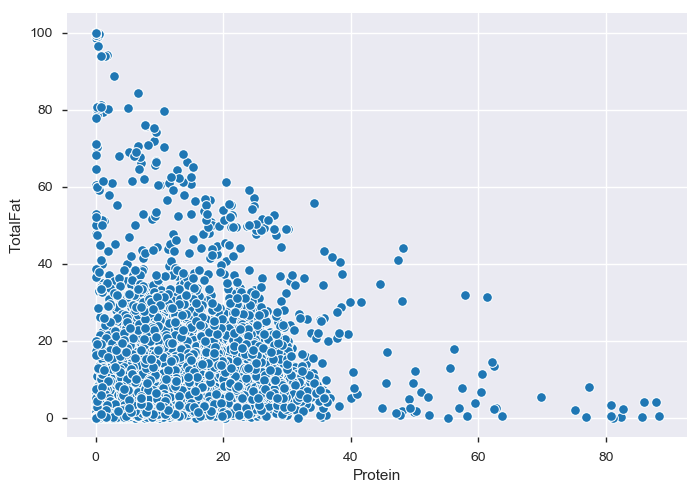

In [42]:
sns.scatterplot(x = "Protein", y = "TotalFat", data = df)

#### The scatter plot is inverse correlated, so, higher protein implies lower total fat, and higher total fat implies lower protein.

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


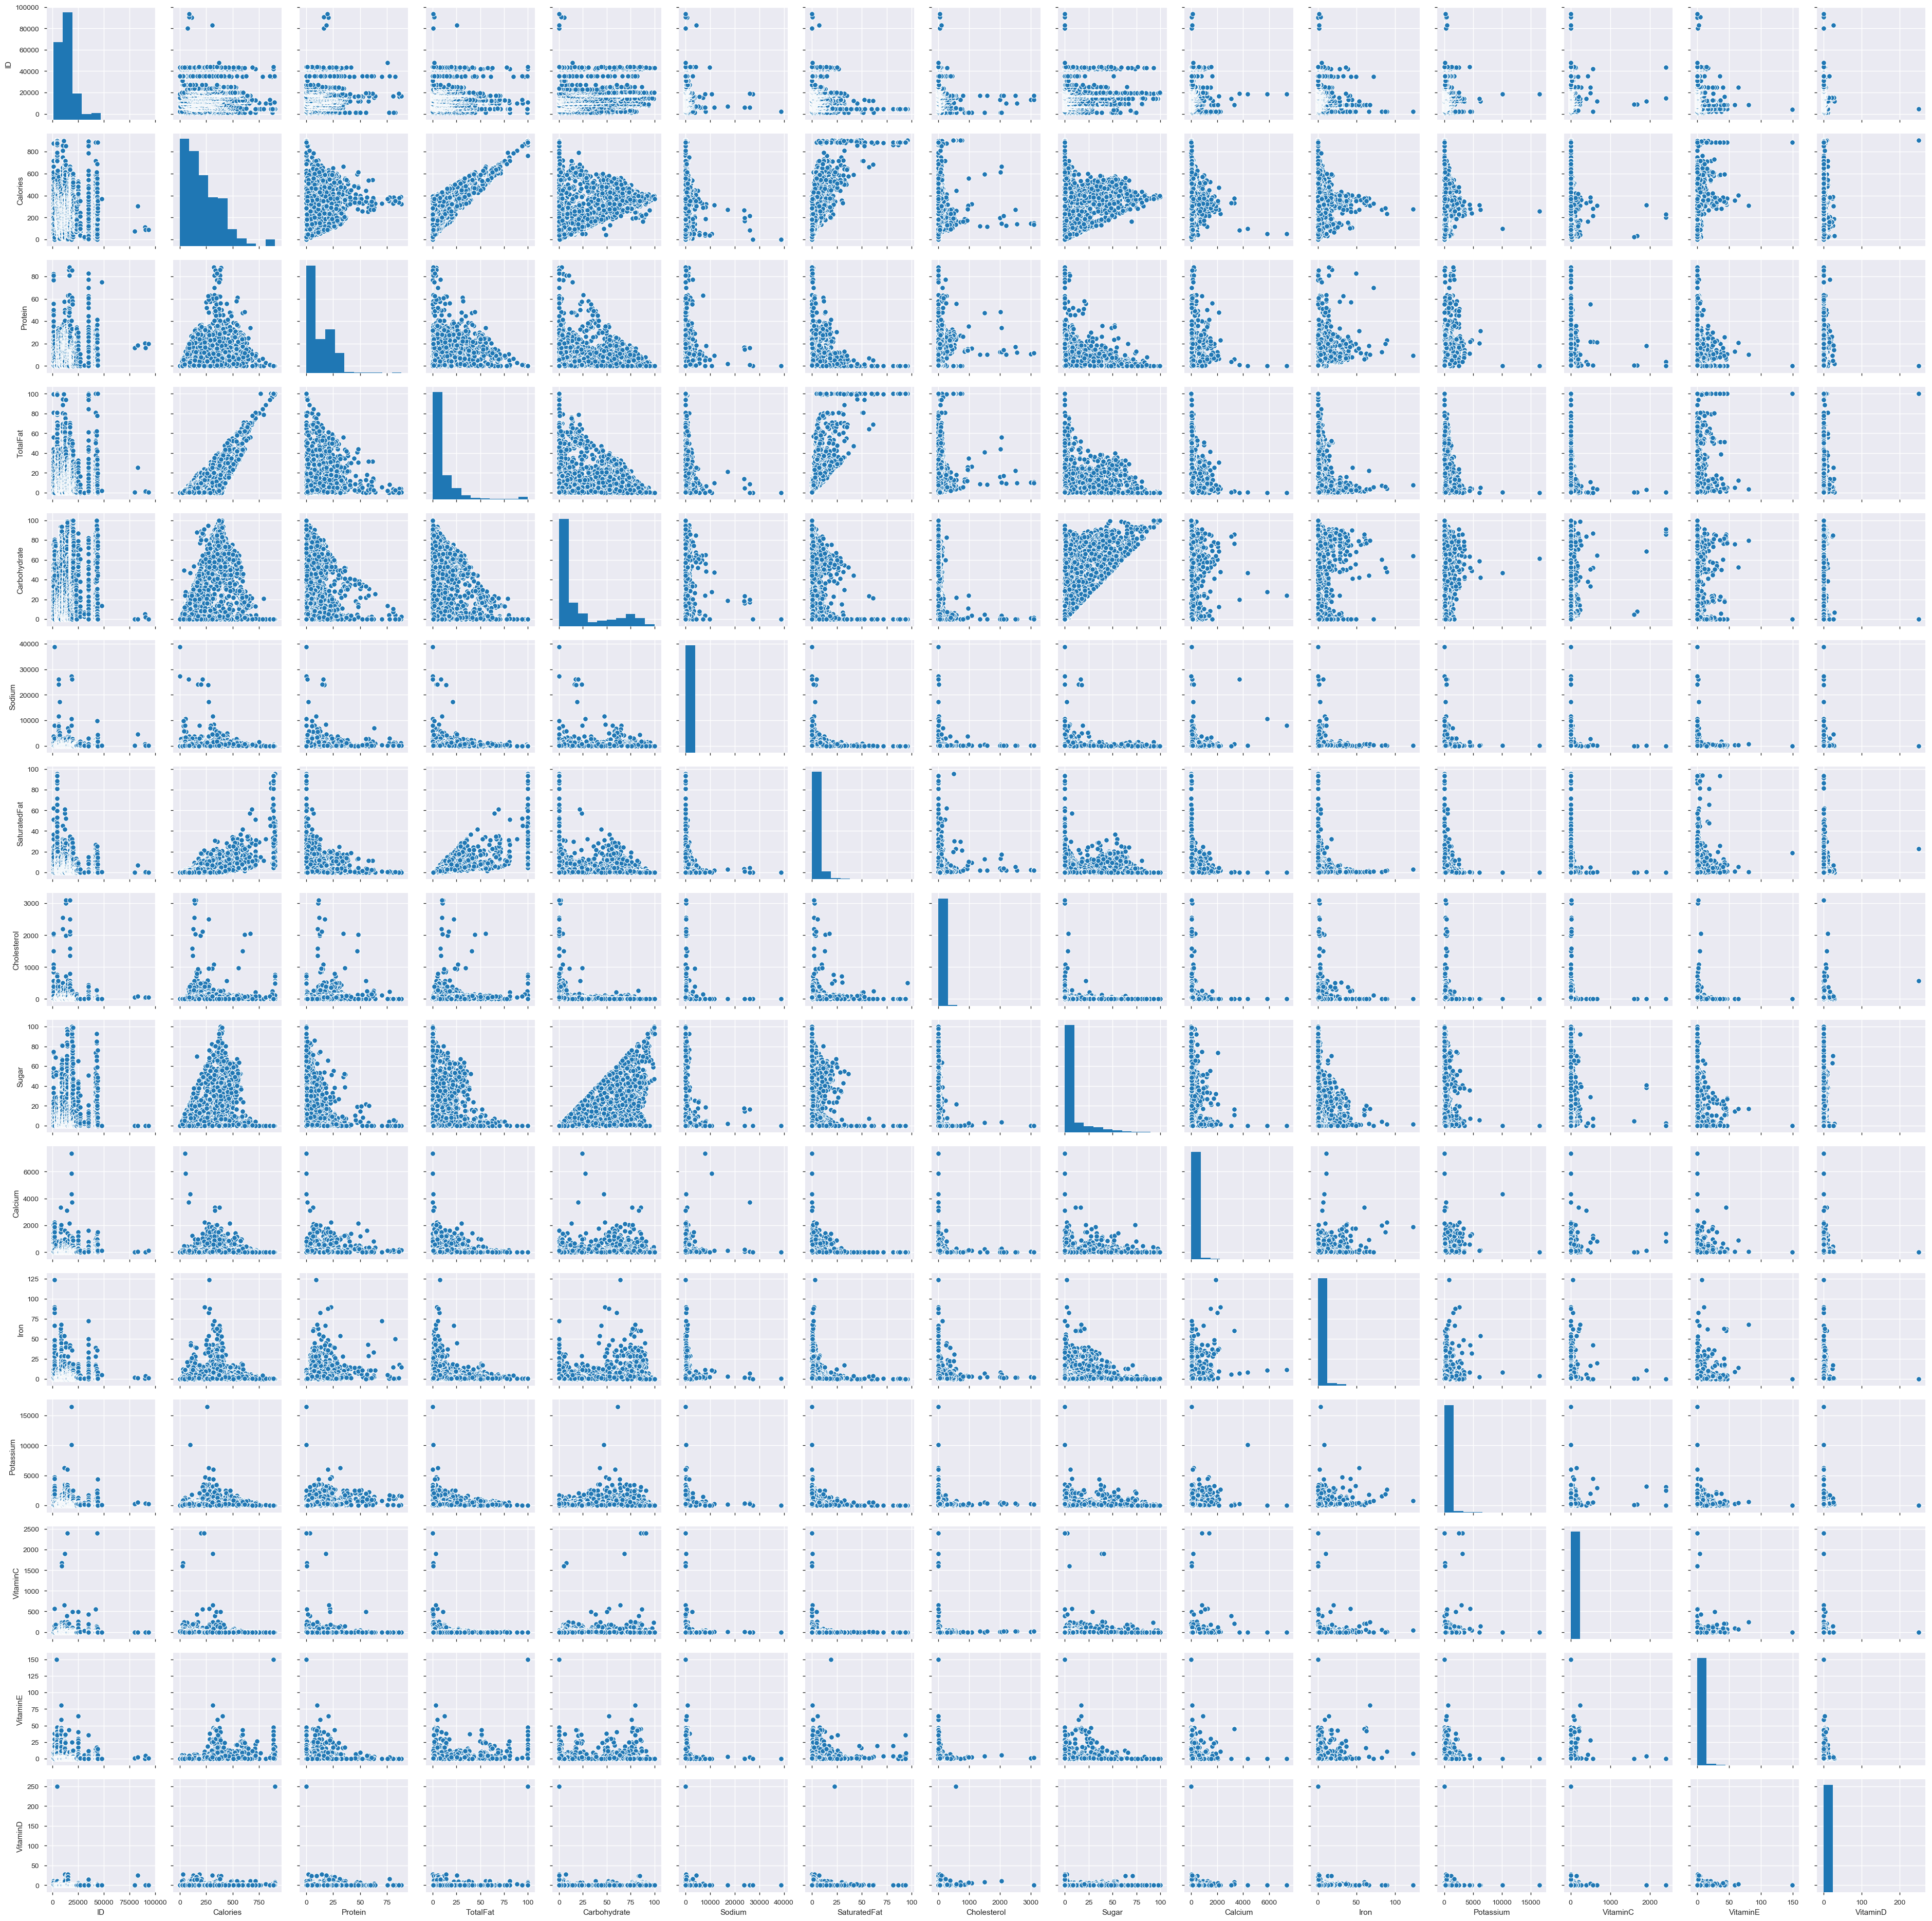

In [43]:
sns.pairplot(df)

#### Vitamin C data with Histogram.

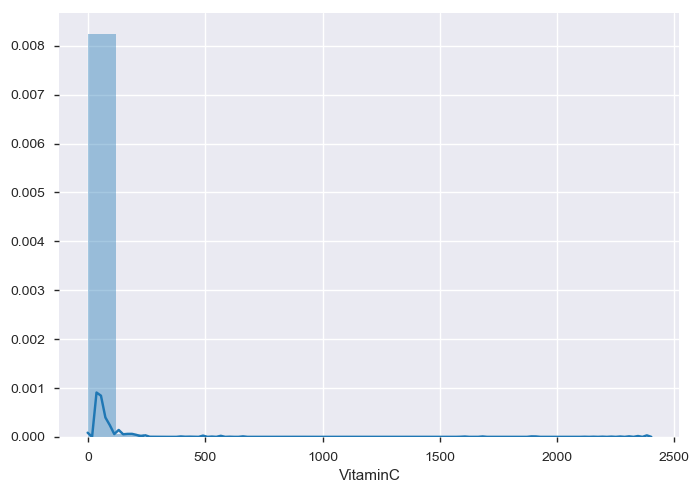

In [67]:
import matplotlib.pyplot as plt
sns.distplot(df['VitaminC'], bins = 20)

(0, 100)

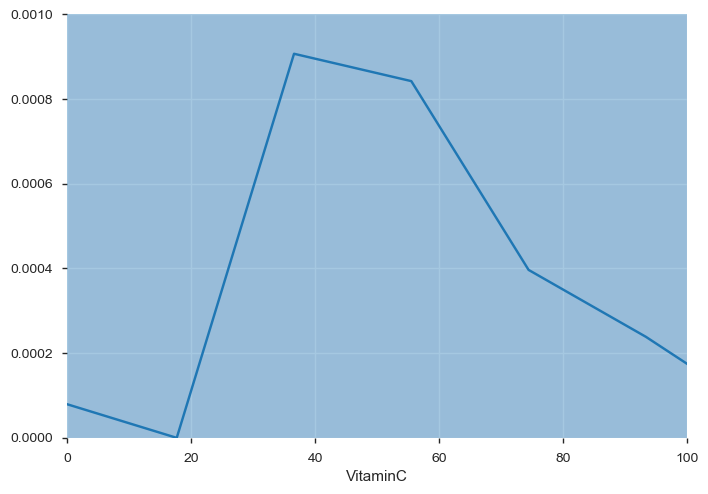

In [70]:
sns.distplot(df['VitaminC'], bins = 20)
plt.ylim(0, 0.001)
plt.xlim(0, 100)

#### Box Plot for sugar data

Text(0.5, 0, 'Sugar')

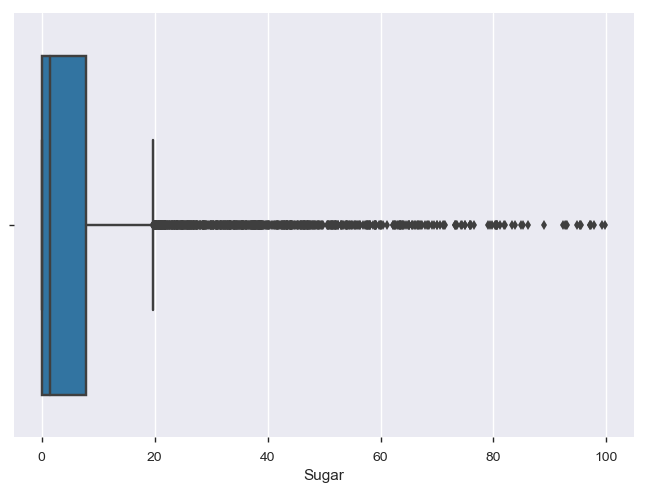

In [73]:
sns.boxplot(df['Sugar'])
plt.xlabel('Sugar')

#### Create new column in the dataframe with conditional of high sodium content.

In [75]:
import numpy as np
df['High Sodium'] = np.where(df['Sodium']> df['Sodium'].mean(), 'Yes', 'No')

In [76]:
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,High Sodium
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,Yes
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,Yes
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,No
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,Yes
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,Yes


In [78]:
df['High Sodium'].dtype

dtype('O')

In [84]:
df['High Sodium'] = np.where(df['High Sodium'] == 'Yes', 1, 0)

In [86]:
df.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,High Sodium
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,1
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,1
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,0
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,1
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,1
